# Multi-Task Learning for Computer Vision Classification with Keras

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import json, csv

## Load CIFAR10 dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [3]:
print('Shape of CIFAR10 dataset: \n', )
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Get number of instances for each class

airplane_count = 0
automobile_count = 0
bird_count = 0
cat_count = 0
deer_count = 0
dog_count = 0
frog_count = 0
horse_count = 0
ship_count = 0
truck_count = 0

for sample in y_train:
    if sample == 0:
        airplane_count += 1
    elif sample == 1:
        automobile_count += 1
    elif sample == 2:
        bird_count += 1
    elif sample == 3:
        cat_count += 1
    elif sample == 4:
        deer_count += 1
    elif sample == 5:
        dog_count += 1
    elif sample == 6:
        frog_count += 1
    elif sample == 7:
        horse_count += 1
    elif sample == 8:
        ship_count += 1
    elif sample == 9:
        truck_count += 1
        
print('\n')
print(f'Number of samples of the class airplane: {airplane_count}')
print(f'Number of samples of the class automobile: {automobile_count}')
print(f'Number of samples of the class bird: {bird_count}')
print(f'Number of samples of the class cat: {cat_count}')
print(f'Number of samples of the class deer: {deer_count}')
print(f'Number of samples of the class dog: {dog_count}')
print(f'Number of samples of the class frog: {frog_count}')
print(f'Number of samples of the class horse: {horse_count}')
print(f'Number of samples of the class ship: {ship_count}')
print(f'Number of samples of the class truck: {truck_count}')

print('\nThe dataset is completely balanced')


Shape of CIFAR10 dataset: 

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Number of samples of the class airplane: 5000
Number of samples of the class automobile: 5000
Number of samples of the class bird: 5000
Number of samples of the class cat: 5000
Number of samples of the class deer: 5000
Number of samples of the class dog: 5000
Number of samples of the class frog: 5000
Number of samples of the class horse: 5000
Number of samples of the class ship: 5000
Number of samples of the class truck: 5000

The dataset is completely balanced


# Import datasets
## Todo: Split them into train-val-test
### Todo: After, split into train-val and use test on kaggle


In [2]:
with open('C:/Users/agkat/Documents/College/1. SML/A1/domain1_train.json', 'r') as file:
   domain1_data = [json.loads(line) for line in file]

with open('C:/Users/agkat/Documents/College/1. SML/A1/domain2_train.json', 'r') as file:
    domain2_data = [json.loads(line) for line in file]


# Rearrange data

In [16]:
# Data is being split for validation in the package
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Separate the text and labels from the training set
Xd1 = [instance['text'] for instance in domain1_data]
Yd1 = [instance['label'] for instance in domain1_data]

# Pad to length
Xd1 = pad_sequences(Xd1, padding='post', value=0, maxlen=1075)

# Randomly(?) select lower number of these 
Xd1 = Xd1[:14900]
Yd1 = Yd1[:14900]

In [18]:
# Data is being split for validation in the package
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Separate the text and labels from the training set
Xd2 = [instance['text'] for instance in domain2_data]
Yd2 = [instance['label'] for instance in domain2_data]

# Pad to length
Xd2 = pad_sequences(Xd2, padding='post', value=0, maxlen=1075)
# Xvald2 = pad_sequences(Xvald2, padding='post', value=0, maxlen=1075)

Xd2.shape

(14900, 1075)

In [19]:
len(Yd1)

14900

In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Split the combined data into training and validation sets
d1_train, d1_val = train_test_split(domain1_data, test_size=0.2, random_state=42)

# Separate the text and labels from the training set
Xd1 = [instance['text'] for instance in d1_train]
Yd1 = [instance['label'] for instance in d1_train]

# Separate the text and labels from the validation set
Xvald1 = [instance['text'] for instance in d1_val]
Yvald1 = [instance['label'] for instance in d1_val]

# Pad to length
Xd1 = pad_sequences(Xd1, padding='post', value=0, maxlen=1075)
Xvald1 = pad_sequences(Xvald1, padding='post', value=0, maxlen=1075)

# Limiting domain 1 data to 11920 observations as this is how many are in domain 2
X

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Split the combined data into training and validation sets
d2_train, d2_val = train_test_split(domain2_data, test_size=0.2, random_state=42)


# Separate the text and labels from the training set
Xd2 = [instance['text'] for instance in d2_train]
Yd2 = [instance['label'] for instance in d2_train]


# Separate the text and labels from the validation set
Xvald2 = [instance['text'] for instance in d2_val]
Yvald2 = [instance['label'] for instance in d2_val]

# Pad to length
Xd2 = pad_sequences(Xd2, padding='post', value=0, maxlen=1075)
Xvald2 = pad_sequences(Xvald2, padding='post', value=0, maxlen=1075)

In [81]:
Xd1

array([[  70,  746,  825, ...,    0,    0,    0],
       [1209,  179, 1952, ...,    0,    0,    0],
       [ 287,    3, 3330, ...,    0,    0,    0],
       ...,
       [   0,    2,  224, ...,    0,    0,    0],
       [1506,    2,  132, ...,    0,    0,    0],
       [  11, 2715,   12, ...,    0,    0,    0]])

## Build Model

In [113]:
# Single model

gamma = 0.5

d1i = tf.keras.layers.Input(shape=(1075, ), name='d1')
d2i = tf.keras.layers.Input(shape=(1075, ), name='d2')

domain1_task = tf.keras.layers.Dense(1075, activation='relu')(d1i)
domain1_task = tf.keras.layers.Dense(512, activation='relu')(domain1_task)
domain1_task = tf.keras.layers.Dense(256, activation='relu')(domain1_task)
domain1_task = tf.keras.layers.Dense(128, activation='relu')(domain1_task)
domain1_task = tf.keras.layers.Dense(8, activation='relu')(domain1_task)
domain1_task = tf.keras.layers.Dense(1, activation='sigmoid', name='task_1_output')(domain1_task)

domain2_task = tf.keras.layers.Dense(1075, activation='relu')(d2i)
domain2_task = tf.keras.layers.Dense(512, activation='relu')(domain1_task)
domain2_task = tf.keras.layers.Dense(256, activation='relu')(domain2_task)
domain2_task = tf.keras.layers.Dense(100, activation='relu')(domain2_task)
domain2_task = tf.keras.layers.Dense(2, activation='relu')(domain2_task)
domain2_task = tf.keras.layers.Dense(1, activation='sigmoid', name='task_2_output')(domain2_task)

model = tf.keras.Model(inputs = [d1i, d2i], outputs = [domain1_task, domain2_task])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), 
              loss_weights = [gamma, 1-gamma], 
              metrics=['accuracy'])
              # {'domain1_task': 'binary_crossentropy', 'domain2_task': 'binary_crossentropy'},
                  # loss_weights={'domain1_task': gamma, 'domain2_task': 1 - gamma}, 
print(model.summary())

# model.fit([Xd1, Xd2],[Yd1, Yd2], epochs=5, batch_size=32, verbose=0)

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 d1 (InputLayer)             [(None, 1075)]               0         []                            
                                                                                                  
 dense_144 (Dense)           (None, 1075)                 1156700   ['d1[0][0]']                  
                                                                                                  
 dense_145 (Dense)           (None, 512)                  550912    ['dense_144[0][0]']           
                                                                                                  
 dense_146 (Dense)           (None, 256)                  131328    ['dense_145[0][0]']           
                                                                                           

In [52]:
list(X1[0])

[126,
 1,
 199,
 0,
 3,
 19,
 718,
 126,
 1,
 199,
 3297,
 3165,
 3,
 1631,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [21]:
X1 = list([list(x) for x in Xd1])
X2 = list([list(x) for x in Xd2])

X1 = np.array(X1)
X2 = np.array(X2)
Yd1 = np.array(Yd1)
Yd2 = np.array(Yd2)


In [22]:
# len(Yd1)
X1.shape

(14900, 1075)

In [112]:
trained_model = model.fit([X1, X2],[Yd1, Yd2], epochs=5, batch_size=32, verbose=0, validation_split=0.2)

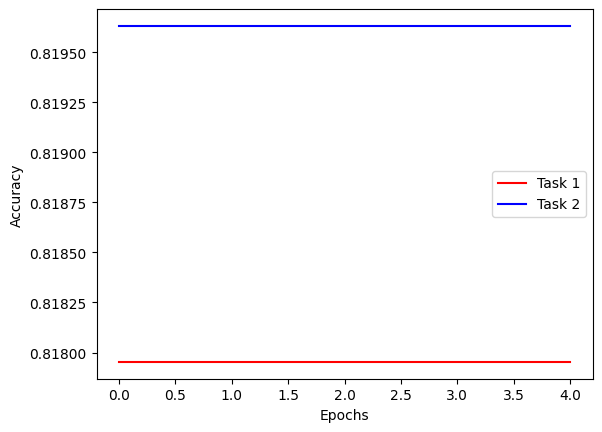

In [117]:
history = trained_model
plt.plot(range(len(history.history['task_1_output_accuracy'])), history.history['task_1_output_accuracy'], c='r', label='Task 1')
plt.plot(range(len(history.history['task_2_output_accuracy'])), history.history['task_2_output_accuracy'], c='b', label='Task 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Now creating simpler model structure

In [3]:
k1 = [instance['label'] for instance in domain1_data]
v1 = [instance['text'] for instance in domain1_data]

k2 = [instance['label'] for instance in domain2_data]
v2 = [instance['text'] for instance in domain2_data]

In [29]:
integer_lookup = tf.keras.layers.IntegerLookup(vocabulary=list(range(0,5000)))

# Fit the IntegerLookup layer on the input data
# integer_lookup.adapt(v1)

# Create the model
model = tf.keras.models.Sequential([
   integer_lookup,
   tf.keras.layers.Dense(256, activation='relu'),
   tf.keras.layers.Dense(128, activation='relu'),
   tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X1, Yd1, epochs=10)

# Make predictions
predictions = model.predict(X2)

Epoch 1/10
466/466 [==============================] - 4s 8ms/step - loss: 5.4594 - accuracy: 0.6680
Epoch 2/10
466/466 [==============================] - 3s 7ms/step - loss: 0.9060 - accuracy: 0.7074
Epoch 3/10
466/466 [==============================] - 3s 7ms/step - loss: 0.6111 - accuracy: 0.7440
Epoch 4/10
466/466 [==============================] - 3s 7ms/step - loss: 0.5393 - accuracy: 0.7704
Epoch 5/10
466/466 [==============================] - 3s 7ms/step - loss: 0.5333 - accuracy: 0.7696
Epoch 6/10
466/466 [==============================] - 3s 7ms/step - loss: 0.5116 - accuracy: 0.7809
Epoch 7/10
466/466 [==============================] - 3s 7ms/step - loss: 0.5249 - accuracy: 0.7777
Epoch 8/10
466/466 [==============================] - 3s 7ms/step - loss: 0.5084 - accuracy: 0.7833
Epoch 9/10
466/466 [==============================] - 3s 7ms/step - loss: 0.4861 - accuracy: 0.7901
Epoch 10/10
466/466 [==============================] - 2s 4ms/step


In [33]:
X1.shape

(14900, 1075)

In [34]:
# Little more complicated
d1i = tf.keras.layers.Input(shape=(1075, ), name='d1')
d2i = tf.keras.layers.Input(shape=(1075, ), name='d2')

integer_lookup = tf.keras.layers.IntegerLookup(vocabulary=list(range(0,5000)))

domain1_task = integer_lookup(d1i)
domain2_task = integer_lookup(d2i)

shared_layer1 = tf.keras.layers.Dense(16, activation='relu')
shared_layer2 = tf.keras.layers.Dense(16, activation='relu')

domain1_task = shared_layer1(domain1_task)
domain1_task = shared_layer2(domain1_task)

domain2_task = shared_layer1(domain2_task)
domain2_task = shared_layer2(domain2_task)

domain1_task = tf.keras.layers.Dense(8, activation='relu')(domain1_task)
domain1_task = tf.keras.layers.Dense(1, activation='sigmoid', name='D1O')(domain1_task)

domain2_task = tf.keras.layers.Dense(8, activation='relu')(domain2_task)
domain2_task = tf.keras.layers.Dense(1, activation='sigmoid', name='D2O')(domain2_task)


model = tf.keras.Model(inputs = [d1i, d2i], outputs = [domain1_task, domain2_task])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([X1, X2], [Yd1, Yd2], epochs=10)

# Make predictions
# predictions = model.predict(X2)

Epoch 1/10
466/466 [==============================] - 3s 5ms/step - loss: 8.2971 - D1O_loss: 4.4673 - D2O_loss: 3.8298 - D1O_accuracy: 0.6095 - D2O_accuracy: 0.8173
Epoch 2/10
466/466 [==============================] - 2s 5ms/step - loss: 1.1398 - D1O_loss: 0.6675 - D2O_loss: 0.4723 - D1O_accuracy: 0.6558 - D2O_accuracy: 0.8523
Epoch 3/10
466/466 [==============================] - 2s 5ms/step - loss: 1.0634 - D1O_loss: 0.6421 - D2O_loss: 0.4213 - D1O_accuracy: 0.6581 - D2O_accuracy: 0.8536
Epoch 4/10
466/466 [==============================] - 2s 5ms/step - loss: 1.0544 - D1O_loss: 0.6371 - D2O_loss: 0.4173 - D1O_accuracy: 0.6596 - D2O_accuracy: 0.8552
Epoch 5/10
466/466 [==============================] - 2s 5ms/step - loss: 1.0527 - D1O_loss: 0.6361 - D2O_loss: 0.4166 - D1O_accuracy: 0.6578 - D2O_accuracy: 0.8549
Epoch 6/10
466/466 [==============================] - 2s 5ms/step - loss: 1.0509 - D1O_loss: 0.6360 - D2O_loss: 0.4149 - D1O_accuracy: 0.6588 - D2O_accuracy: 0.8554
Epoch 7/10

In [30]:
from sklearn.metrics import accuracy_score
predictions = [1 if p >= 0.5 else 0 for p in predictions]
accuracy_score(predictions, Yd2)

0.5303355704697986

In [ ]:
data = v1[0:10]
ohe = np.zeros((len(data), 1075, 5001))

for i, sq in enumerate(data):
    print(i,sq)
    for j, d in enumerate(sq):
        ohe[i, j, d] = 1

In [119]:
def buildModel(gamma):    
    d1i = tf.keras.layers.Input(shape=(1075, 5001, ), name='d1')
    d2i = tf.keras.layers.Input(shape=(1075, 5001, ), name='d2')
    
    domain1_task = tf.keras.layers.Dense(1075, activation='relu')(d1i)
    domain1_task = tf.keras.layers.Dense(512, activation='relu')(domain1_task)
    domain1_task = tf.keras.layers.Dense(256, activation='relu')(domain1_task)
    domain1_task = tf.keras.layers.Dense(128, activation='relu')(domain1_task)
    domain1_task = tf.keras.layers.Dense(8, activation='relu')(domain1_task)
    domain1_task = tf.keras.layers.Dense(1, activation='sigmoid', name='task_1_output')(domain1_task)
    
    domain2_task = tf.keras.layers.Dense(1075, activation='relu')(d2i)
    domain2_task = tf.keras.layers.Dense(512, activation='relu')(domain1_task)
    domain2_task = tf.keras.layers.Dense(256, activation='relu')(domain2_task)
    domain2_task = tf.keras.layers.Dense(100, activation='relu')(domain2_task)
    domain2_task = tf.keras.layers.Dense(2, activation='relu')(domain2_task)
    domain2_task = tf.keras.layers.Dense(1, activation='sigmoid', name='task_2_output')(domain2_task)
    
    model = tf.keras.Model(inputs = [d1i, d2i], outputs = [domain1_task, domain2_task])
    
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), 
                  loss_weights = [gamma, 1-gamma], 
                  metrics=['accuracy'])
                  # {'domain1_task': 'binary_crossentropy', 'domain2_task': 'binary_crossentropy'},
                      # loss_weights={'domain1_task': gamma, 'domain2_task': 1 - gamma}, 
    # print(model.summary())
    return model
    # model.fit([Xd1, Xd2],[Yd1, Yd2], epochs=5, batch_size=32, verbose=0)

## Compile Model

In [119]:
def buildModel(gamma):    
    d1i = tf.keras.layers.Input(shape=(1075, ), name='d1')
    d2i = tf.keras.layers.Input(shape=(1075, ), name='d2')
    
    domain1_task = tf.keras.layers.Dense(1075, activation='relu')(d1i)
    domain1_task = tf.keras.layers.Dense(512, activation='relu')(domain1_task)
    domain1_task = tf.keras.layers.Dense(256, activation='relu')(domain1_task)
    domain1_task = tf.keras.layers.Dense(128, activation='relu')(domain1_task)
    domain1_task = tf.keras.layers.Dense(8, activation='relu')(domain1_task)
    domain1_task = tf.keras.layers.Dense(1, activation='sigmoid', name='task_1_output')(domain1_task)
    
    domain2_task = tf.keras.layers.Dense(1075, activation='relu')(d2i)
    domain2_task = tf.keras.layers.Dense(512, activation='relu')(domain1_task)
    domain2_task = tf.keras.layers.Dense(256, activation='relu')(domain2_task)
    domain2_task = tf.keras.layers.Dense(100, activation='relu')(domain2_task)
    domain2_task = tf.keras.layers.Dense(2, activation='relu')(domain2_task)
    domain2_task = tf.keras.layers.Dense(1, activation='sigmoid', name='task_2_output')(domain2_task)
    
    model = tf.keras.Model(inputs = [d1i, d2i], outputs = [domain1_task, domain2_task])
    
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), 
                  loss_weights = [gamma, 1-gamma], 
                  metrics=['accuracy'])
                  # {'domain1_task': 'binary_crossentropy', 'domain2_task': 'binary_crossentropy'},
                      # loss_weights={'domain1_task': gamma, 'domain2_task': 1 - gamma}, 
    # print(model.summary())
    return model
    # model.fit([Xd1, Xd2],[Yd1, Yd2], epochs=5, batch_size=32, verbose=0)

## Fit batch of models

In [123]:
import time
# FIT BATCH OF MODELS

def fit_batch(gamma_values):
    
    history = list()
    trained_models = list()
    
    print('Starting training on batch of models for gamma values ', gamma_values, '\n\n')
    
    for gamma in gamma_values:
        
        print('Training model for gamma equal to ', gamma)
        model = buildModel(gamma)
        start = time.time()
        # model_history = model.fit([Xd1, Xd2],[Yd1, Yd2], epochs=5, batch_size=128, verbose=0)
        model_history = model.fit([X1, X2],[Yd1, Yd2], epochs=25, batch_size=64, verbose=0, validation_split=0.2)
        print(f'Training time: {time.time() - start}\n')
        history.append(model_history)
        trained_models.append(model)
        
    return history, trained_models
        

In [124]:
gammas = [0., 0.5, 1.]
training_history, trained_models = fit_batch(gammas)

Starting training on batch of models for gamma values  [0.0, 0.5, 1.0] 


Training model for gamma equal to  0.0
Training time: 96.97163558006287

Training model for gamma equal to  0.5
Training time: 95.72155499458313

Training model for gamma equal to  1.0
Training time: 95.03765082359314



## Plot Accuracies

In [125]:
import matplotlib.pyplot as plt


def plot_multitask_accuracies(gammas, training_history):
    
    counter = 0

    for history in training_history:

        print(f'\nPlotting Accuracy vs Epochs for value of gamma number {gammas[counter]}\n')
        plt.plot(range(len(history.history['task_1_output_accuracy'])), history.history['task_1_output_accuracy'], c='r', label='Task 1')
        plt.plot(range(len(history.history['task_2_output_accuracy'])), history.history['task_2_output_accuracy'], c='b', label='Task 2')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        counter += 1
    


Plotting Accuracy vs Epochs for value of gamma number 0.0



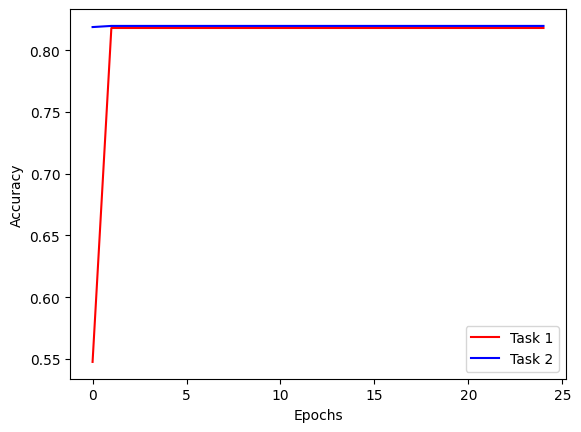


Plotting Accuracy vs Epochs for value of gamma number 0.5



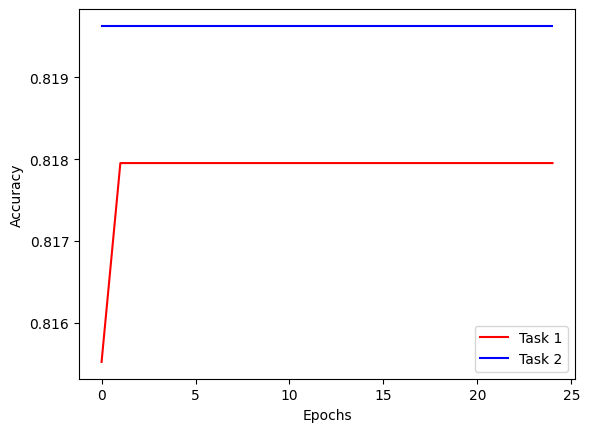


Plotting Accuracy vs Epochs for value of gamma number 1.0



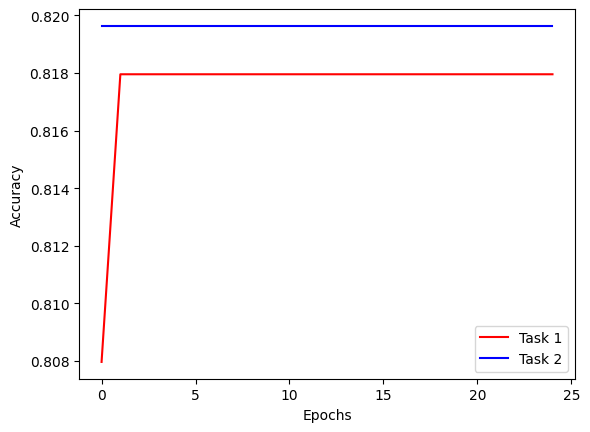

In [126]:
plot_multitask_accuracies(gammas, training_history)

## Test set now

In [127]:
with open('C:/Users/agkat/Documents/College/1. SML/A1/test_set.json', 'r') as file:
   test_data = [json.loads(line) for line in file]

Expected labels:  [0. 0. 0. 0. 1. 0. 0. 0.] [1. 0.]
(1, 32, 32, 3)


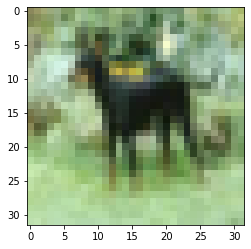

In [13]:
import random

# Pick random image of test data, which will be used to evaluate each task
random_ind = random.randrange(0, x_test.shape[0], 1)
image = x_test[random_ind,:,:,:]
print('Expected labels: ', y_test_1[random_ind], y_test_2[random_ind])
plt.imshow(image)

image = np.expand_dims(image, axis=0)
print(image.shape)


In [14]:
# Get prediction for both tasks, and compare them to the real classes 
# (predictions will be done on the model trained with gamma=0.5)

trained_model = trained_models[2]
for pred in trained_model.predict(image):
    print('Task prediction: ', np.argmax(pred))
# trained_model.predict(image)

1/1 [==============================] - 0s 79ms/step
Task prediction:  4
Task prediction:  0


In [129]:
# Separate the text and labels from the training set
test_text = [instance['text'] for instance in test_data]
test_text = pad_sequences(test_text, padding='post', value=0, maxlen=1075)
X_test = np.array([np.array(lst) for lst in test_text])

In [130]:
X_test

array([[  59,    2, 3434, ...,    0,    0,    0],
       [   2,  785,    6, ...,    0,    0,    0],
       [3306,    4,    2, ...,    0,    0,    0],
       ...,
       [   2,  495,  752, ...,    0,    0,    0],
       [   2, 4433,  299, ...,    0,    0,    0],
       [   9, 1017,    4, ...,    0,    0,    0]])

In [133]:
pred = model.predict([X_test, X_test])

32/32 [==============================] - 0s 4ms/step


In [159]:
model.predict([X1[0:2], X1[0:2]])

1/1 [==============================] - 0s 16ms/step


[array([[0.5071332 ],
        [0.99996144]], dtype=float32),
 array([[0.4998563 ],
        [0.49971664]], dtype=float32)]

In [156]:
for p in pred[1]:
    print(p, p==0.5)

[0.49971664] [False]
[0.49971664] [False]
[0.49999753] [False]
[0.49971664] [False]
[0.49971783] [False]
[0.4997168] [False]
[0.49999383] [False]
[0.49971664] [False]
[0.49971664] [False]
[0.49999717] [False]
[0.5] [ True]
[0.4997167] [False]
[0.4999666] [False]
[0.49971664] [False]
[0.49971664] [False]
[0.49971664] [False]
[0.4999999] [False]
[0.49971664] [False]
[0.4997378] [False]
[0.49999994] [False]
[0.49971664] [False]
[0.49971664] [False]
[0.49974594] [False]
[0.49999985] [False]
[0.49971664] [False]
[0.49971664] [False]
[0.49971664] [False]
[0.5] [ True]
[0.49971664] [False]
[0.49976802] [False]
[0.49971664] [False]
[0.49972025] [False]
[0.49973726] [False]
[0.49971664] [False]
[0.49971673] [False]
[0.49971664] [False]
[0.49971664] [False]
[0.49971664] [False]
[0.5] [ True]
[0.5] [ True]
[0.49999997] [False]
[0.5] [ True]
[0.4998187] [False]
[0.49999997] [False]
[0.49971664] [False]
[0.49971664] [False]
[0.5] [ True]
[0.49971664] [False]
[0.49971664] [False]
[0.49971664] [False